---
## **Creation High Dimensional Dataset (Navigation Experiments) to predict its labels with the Time Series SVM Classifier**
---

<font size="2">Eudald Sangenis  

The objective of this file is to create the High Dimensional Dataset from the Navigation Experiments Datasets labeled with the Time Series SVM classifier.

Parameters High Dimensional Dataset:  
- 6 signals from the IMU  
- variable window size  

Once this dataset is created the next step is to predict the labels and verify the navigation solution.</font>

---
## **<font size="5">1. Libraries</font>**
---

In [17]:
import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()
# Get the parent directory (where the module is located)
parent_directory = os.path.dirname(current_directory)
# Append the parent directory to sys.path
sys.path.append(parent_directory)

# Import the module
import signal_processing_functions as sp

---
## **<font size="5">2. Data Handling</font>**
---

In [18]:
window = 401            #51, 101, 201, 401
type_dataset = 'exp800' #exp100, exp200, exp300, exp400, exp500, exp600, exp700, exp800, exp900, exp1000
df_exp = type_dataset+'_VN'   
data_dataset = '2023_08_30'
num_signals = 6

# 6 signals
dataset_path_unlab = parent_directory+'\\1_unlabeled_datasets\\'+data_dataset+'\\'
# save dataset path
dataset_save = current_directory+'\\HD_datasets\\'+data_dataset+'\\'
os.makedirs(dataset_save, exist_ok=True)

In [19]:
X = sp.mat2pandas(dataset_path_unlab, df_exp)
X.head(2)

,timestamp,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,0.00000,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.00125,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


In [20]:
print(X.shape)

(72807, 7)


In [21]:
c = ['timestamp']
X = X.drop(columns=c)
X.head(2)

,acc1,acc2,acc3,gyro1,gyro2,gyro3
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


In [22]:
X = X.rename(columns={"acc1": "acc1_t", "acc2": "acc2_t", "acc3": "acc3_t", "gyro1": "gyro1_t", "gyro2": "gyro2_t", "gyro3": "gyro3_t"})
X.head(2)

,acc1_t,acc2_t,acc3_t,gyro1_t,gyro2_t,gyro3_t
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115


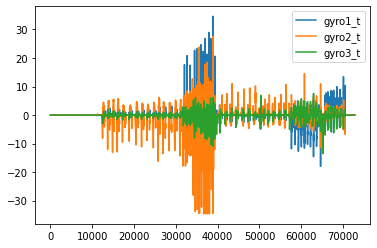

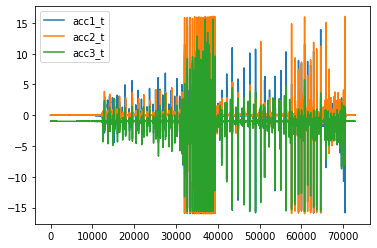

In [23]:
X.plot(y=['gyro1_t','gyro2_t','gyro3_t'], use_index=True)
X.plot(y=['acc1_t','acc2_t','acc3_t'], use_index=True)
plt.show()

Check if there are nan values:

In [24]:
X.isnull().values.any()

False

In [25]:
s = []
for i in range(window-1,-1,-1):
    s = np.concatenate((s, [f'acc1_t{i}', f'acc2_t{i}', f'acc3_t{i}', f'gyro1_t{i}', f'gyro2_t{i}', f'gyro3_t{i}']))
pd.DataFrame(s).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a') 
print('Longitude header df',len(s))

Longitude header df 2406


In [26]:
d = []
for row in tqdm(range(len(X)-window+1)): # range(len(X)-window)
    for i in range(0,window):
        d = np.concatenate((d, X.iloc[row+i,:]))
    pd.DataFrame(d).T.to_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv', header=None, index=None, mode='a')    
    d = []

100%|██████████| 72407/72407 [19:19<00:00, 62.43it/s]


In [27]:
t = pd.read_csv(dataset_save+'HD_'+str(window-1)+'_'+str(num_signals)+'sig_'+type_dataset+'.csv')
t.isnull().values.any()

C:\Users\Eudald\AppData\Local\Temp\ipykernel_57924\4286148646.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254

False

In [28]:
t

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,-0.002282,0.036161,-0.982269,0.00269,0.001292,-0.021956,0.001243,0.034938,-0.978653,0.002432,...,-0.980751,0.004735,-0.000351,-0.019196,-0.000387,0.032107,-0.980945,0.00249,-0.00057,-0.02052
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115,0.001579,0.035264,-0.979132,0.000059,...,-0.980945,0.00249,-0.00057,-0.02052,-0.002862,0.033268,-0.981373,0.001935,-0.0012,-0.023816
2,0.001579,0.035264,-0.979132,0.000059,0.003073,-0.021633,-0.001508,0.037628,-0.979723,0.000365,...,-0.981373,0.001935,-0.0012,-0.023816,-0.007833,0.037709,-0.985468,0.003856,0.000086,-0.023872
3,-0.001508,0.037628,-0.979723,0.000365,0.002861,-0.020359,0.000051,0.036303,-0.979173,0.003192,...,-0.985468,0.003856,0.000086,-0.023872,-0.004696,0.039675,-0.982605,0.003495,-0.000608,-0.022969
4,0.000051,0.036303,-0.979173,0.003192,0.00346,-0.020737,0.00109,0.033034,-0.978836,0.001626,...,-0.982605,0.003495,-0.000608,-0.022969,-0.002465,0.038616,-0.979081,0.002737,0.00081,-0.020203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74041,-0.006448,0.045756,-0.982585,-0.001159,-0.002772,-0.02108,-0.004237,0.042792,-0.98176,-0.002072,...,-0.976127,0.002927,-0.00247,-0.021163,-0.007589,0.045685,-0.974324,0.002509,-0.002947,-0.021268
74042,-0.004237,0.042792,-0.98176,-0.002072,-0.001002,-0.020042,-0.00382,0.044911,-0.974986,-0.000879,...,-0.974324,0.002509,-0.002947,-0.021268,-0.008709,0.047824,-0.977176,0.00186,-0.000195,-0.02169
74043,-0.00382,0.044911,-0.974986,-0.000879,0.000363,-0.019025,-0.005175,0.047997,-0.975078,0.001848,...,-0.977176,0.00186,-0.000195,-0.02169,-0.005602,0.047335,-0.97793,0.001909,-0.000729,-0.02036
74044,-0.005175,0.047997,-0.975078,0.001848,0.000328,-0.019616,-0.006957,0.047376,-0.977512,0.001577,...,-0.97793,0.001909,-0.000729,-0.02036,-0.002934,0.046846,-0.980283,-0.000327,-0.002547,-0.019769


<AxesSubplot:>

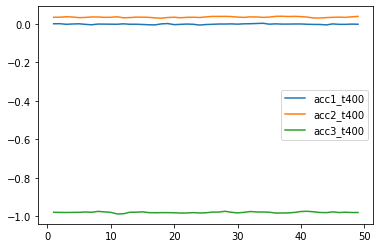

In [31]:
t.iloc[:,0:3].plot()